# SIT744 Assignment 2: Deep Learning Project 

- Name: Muhammad Sohaib bin Kashif
- ID: 221023977
- Subject: Deep Learning

## (HD Task Model)

"NOTE: Make sure to add the same Kaggle.json file in your folders for this notebook file as well!"

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
! kaggle datasets download -d techsash/waste-classification-data --unzip

 97% 414M/427M [00:01<00:00, 252MB/s]
100% 427M/427M [00:01<00:00, 271MB/s]


"For this task, we will introduce our most improved model of all the introduced models..."

In [7]:
#Importing all the libraries and pre-requisites...

#Basic Libraries...
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

#Libraries for Creating our DL Model...
from keras.models import Sequential
from keras.layers import Conv2D, Activation,Dropout
from keras.models import Model,load_model
from keras.layers import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Flatten, Dense

#Libraries for importing components for Model Compilation...
from tensorflow.keras import optimizers

#Libraries for Pre-processing Images...
from keras.preprocessing.image import ImageDataGenerator

In [8]:
#Introducing no Input Pipelining of our new Model...
train_datagen = ImageDataGenerator( ) 
test_datagen = ImageDataGenerator( )

In [9]:
#Creating our testing and training data directories...
train_dir = "/content/DATASET/TRAIN"
test_dir = "/content/DATASET/TEST"
image_size = 150
batch_size = 256

#Applying the Pipelining to our new model...
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size= (image_size,image_size),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_dir, 
        target_size= (image_size,image_size),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [10]:
#Now we will initialize what our model will look like...
NN3 = Sequential()
filters = 32
image_size = 150

#Additional a Convolutional Base with Max Pooling Layers...
NN3.add(Conv2D(filters,(3,3), input_shape = (image_size, image_size ,3) ))
NN3.add(Activation("relu"))
NN3.add(MaxPooling2D())

NN3.add(Conv2D(2*filters,(3,3)))  
NN3.add(Activation("relu"))
NN3.add(MaxPooling2D())

NN3.add(Conv2D(4*filters,(3,3)))
NN3.add(Activation("relu"))
NN3.add(MaxPooling2D())

#Convolutional and MaxPooling Layer removed from here!

In [11]:
#Adding the rest of the basic layers... 
NN3.add(Flatten())
NN3.add(Dense(256))
NN3.add(Activation("relu"))
NN3.add(Dropout(0.5))

NN3.add(Dense(64))
NN3.add(Activation("relu"))
NN3.add(Dropout(0.5))

NN3.add(Dense(2))       #Since there are only two classes for the Output...
NN3.add(Activation("sigmoid"))

In [12]:
#Compiling the Data...
NN3.compile(loss = "binary_crossentropy", optimizer = optimizers.RMSprop(learning_rate=0.001) , metrics = ["accuracy"]) 
batch_size = 256 

In [13]:
NN3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                    

In [14]:
#Training with the Callback...
history3 = NN3.fit_generator( generator = train_generator, epochs=30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
89/89 [==============================] - 38s 363ms/step - loss: 10.2040 - accuracy: 0.6086
Epoch 2/30
89/89 [==============================] - 33s 365ms/step - loss: 1.6703 - accuracy: 0.6100
Epoch 3/30
89/89 [==============================] - 32s 363ms/step - loss: 0.9375 - accuracy: 0.6359
Epoch 4/30
89/89 [==============================] - 32s 356ms/step - loss: 0.5879 - accuracy: 0.7559
Epoch 5/30
89/89 [==============================] - 31s 350ms/step - loss: 0.4993 - accuracy: 0.8065
Epoch 6/30
89/89 [==============================] - 32s 358ms/step - loss: 0.4359 - accuracy: 0.8267
Epoch 7/30
89/89 [==============================] - 31s 351ms/step - loss: 0.4058 - accuracy: 0.8386
Epoch 8/30
89/89 [==============================] - 31s 351ms/step - loss: 0.3830 - accuracy: 0.8515
Epoch 9/30
89/89 [==============================] - 31s 351ms/step - loss: 0.3617 - accuracy: 0.8609
Epoch 10/30
89/89 [==============================] - 31s 352ms/step - loss: 0.3464 - accur

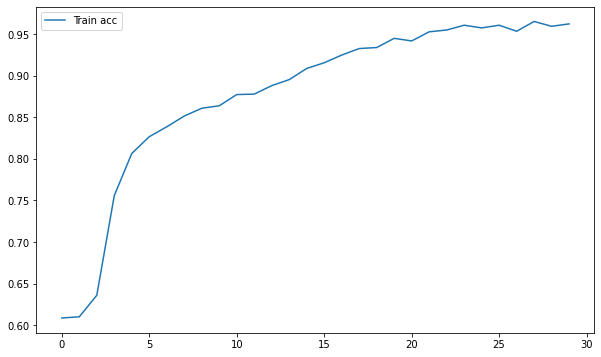

In [15]:
plt.figure(figsize=[10,6])
plt.plot(history3.history["accuracy"], label = "Train acc")
plt.legend()
plt.show()

In [16]:
NN3.evaluate(test_generator)

10/10 [==============================] - 4s 408ms/step - loss: 1.1863 - accuracy: 0.8683


[1.186299204826355, 0.8682849407196045]

In [17]:
! pip install anvil-uplink

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [18]:
#Connecting our Colab Notebook with our Anvil App...
import anvil.server as anvs
import anvil.media
from keras.preprocessing.image import load_img

anvs.connect("XKIAGFLA3QSZESFZPLUEFPXH-HVRN4QJ2U3BJAYR4")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [19]:
image_size = 150

@anvil.server.callable
def waste_classify(image):
  with anvil.media.TempFile(image) as filename:
    new_test_datagen = ImageDataGenerator( )
    new_test_datagen.flow_from_directory(filename, target_size= (image_size,image_size), batch_size = batch_size
                                     ,color_mode= "rgb", class_mode= "categorical")
    
    #Prediciting the Image label...
    pred = NN3.predict(new_test_datagen)

    #Classifying the label...
    if (pred < 0.5):
      label = "Organic!"
    elif (pred <= 0.5):
      label = "Recycleable!"
 
  return label